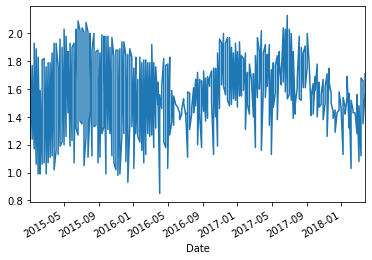

In [5]:
import pandas as pd

df = pd.read_csv('datasets/avocado.csv')
# конвертируем колонку Date к типу DateTime
df['Date'] = pd.to_datetime(df['Date'])
albany_df = df[df['region'] == 'Albany']
albany_df.set_index('Date', inplace=True)
albany_df['AveragePrice'].plot()

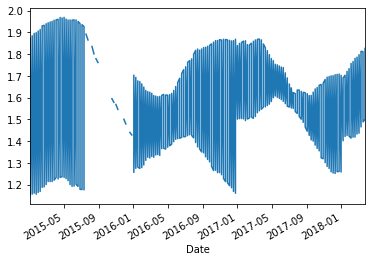

In [6]:
# вычисляем среднее значение с окном в 25 цифр
albany_df['AveragePrice'].rolling(25).mean().plot()

In [9]:
# видим, что даты в странном порядке
albany_df.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

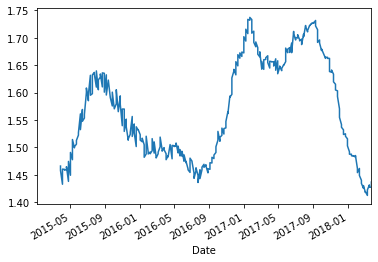

In [15]:
# т.к даты были не сортированы, отсортируем их
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(25).mean().plot()

In [16]:
# создаем новую колонку в нашем dataframe
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

c:\users\zver\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
# видим, что первые 25 строк колонку price25ma будут NaN из-за rolling(25)
albany_df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


In [21]:
# избавимя от NaN
albany_df.dropna().head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


In [23]:
# чтобы не было ссылки на df 
albany_df = df.copy()[df['region'] == 'Albany']
albany_df.set_index('Date', inplace=True)
albany_df.sort_index(inplace=True)
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

In [29]:
# конвертация уникальных значения колонки колонки в list
list(set(df['region'].values.tolist()))

['Roanoke',
 'Southeast',
 'NewOrleansMobile',
 'Sacramento',
 'PhoenixTucson',
 'Charlotte',
 'Houston',
 'NorthernNewEngland',
 'Plains',
 'SanFrancisco',
 'Seattle',
 'GreatLakes',
 'Boise',
 'LasVegas',
 'Philadelphia',
 'Indianapolis',
 'Detroit',
 'Northeast',
 'GrandRapids',
 'Atlanta',
 'LosAngeles',
 'RichmondNorfolk',
 'Portland',
 'WestTexNewMexico',
 'Midsouth',
 'HarrisburgScranton',
 'Louisville',
 'HartfordSpringfield',
 'NewYork',
 'TotalUS',
 'BuffaloRochester',
 'DallasFtWorth',
 'Tampa',
 'StLouis',
 'SouthCentral',
 'West',
 'SouthCarolina',
 'Spokane',
 'Pittsburgh',
 'SanDiego',
 'Boston',
 'Columbus',
 'Syracuse',
 'California',
 'Albany',
 'Nashville',
 'Jacksonville',
 'Orlando',
 'RaleighGreensboro',
 'MiamiFtLauderdale',
 'BaltimoreWashington',
 'Chicago',
 'CincinnatiDayton',
 'Denver']

In [31]:
# то же самое только короче
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [39]:
# мы получаем взрыв по памяти, это из-за поля type, я не разобрался почему, но проблема скрывается в нем
# создали новый DataFrame
graph_df = pd.DataFrame()
cnt = 0
# создаем DataFrame region_df в который мы копируем все поля df с уникальными регионами
for region in df['region'].unique()[:16]:   
    # копируем, чтобы не было ссылок
    region_df = df.copy()[df['region'] == region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    #создаем уникальные колонки по реагионам 
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    # если graph_df пуст то ссылаемся на region_df
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    # если не пуст, джоиним по уникальным столбцам
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

        

MemoryError: 

In [42]:
# теперь сделаем как надо
import pandas as pd

df = pd.read_csv('datasets/avocado.csv')
df = df.copy()[df['type'] == 'organic'] 
# конвертируем колонку Date к типу DateTime
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', ascending=True, inplace=True)

# создали новый DataFrame
graph_df = pd.DataFrame()
cnt = 0
# создаем DataFrame region_df в который мы копируем все поля df с уникальными регионами
for region in df['region'].unique():   
    # копируем, чтобы не было ссылок
    region_df = df.copy()[df['region'] == region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    #создаем уникальные колонки по реагионам 
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    # если graph_df пуст то ссылаемся на region_df
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    # если не пуст, джоиним по уникальным столбцам
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
        
graph_df.tail()

,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,...,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


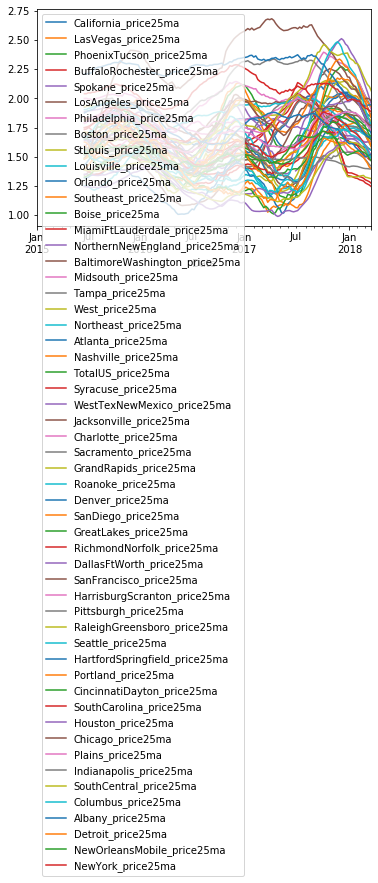

In [48]:
# попробуем вывести график
graph_df.plot()

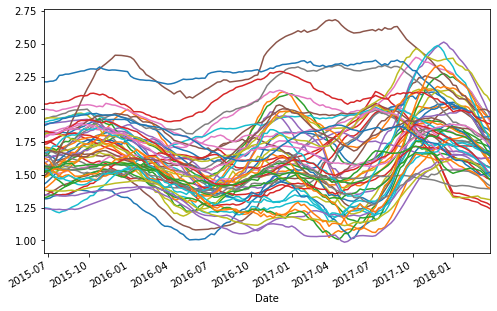

In [49]:
# сделаем версию получше 
graph_df.dropna().plot(figsize=(8,5), legend=False)